## **1. Installation**

Load your dataset

In [6]:
!git clone https://github.com/Rene-Michel99/Mask-RCNN-TF2.8.git

Cloning into 'Mask-RCNN-TF2.8'...
remote: Enumerating objects: 817, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 817 (delta 35), reused 49 (delta 22), pack-reused 702
Receiving objects: 100% (817/817), 128.85 MiB | 27.44 MiB/s, done.
Resolving deltas: 100% (459/459), done.


In [7]:
!mv ./Mask-RCNN-TF2.8/* ./
!rm -rf ./Mask-RCNN-TF2.8

In [3]:
!nvidia-smi

Tue Aug  8 14:51:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 101.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 115.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 114.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 73.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found ex

## **2. Image Dataset**

Load your annotated dataset


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [9]:
# Extract Images
!cp "drive/MyDrive/Colab Notebooks/Dataset/Alita and Poros.v9i.coco-segmentation.zip" ./
!unzip "Alita and Poros.v9i.coco-segmentation.zip"

Archive:  Alita and Poros.v9i.coco-segmentation.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/02_sm_bmp.rf.af3e38b6650765d0fc8d961c689f62ac.jpg  
 extracting: test/05_sm_bmp.rf.3eb5ffd6f55858c6387cc746dde63b43.jpg  
 extracting: test/08_sm_bmp.rf.85c4916a9ed31a8a6417a27f510293d8.jpg  
 extracting: test/1-1_bmp.rf.5710f73f56b845b53f8f8abc6a61769d.jpg  
 extracting: test/10_bmp.rf.4384537c75fe8c89c02690f90848769f.jpg  
 extracting: test/10_sm_bmp.rf.40ccd0670dcb7222a6214b6dc450bf5b.jpg  
 extracting: test/11-6_bmp.rf.503ac11afa7282bb1c90fdb6a2d961f2.jpg  
 extracting: test/12-5_bmp.rf.4645571a0f9b50352a7135adf98ac8a0.jpg  
 extracting: test/12_sm_bmp.rf.467e3f28dcf7e8c27ea354b7bd87f13b.jpg  
 extracting: test/13_bmp.rf.d99e06f89374a9c84a9771fa56ecc3df.jpg  
 extracting: test/13_sm_bmp.rf.3401eec5dffc81839f767fb7f65f9102.jpg  
 extracting: test/13_sm_bmp.rf.5e9b4130d034154c56062982726a2508.jpg  
 extracting: test/13_sm

In [2]:
from mrcnn.Dataset import load_images_dataset


dataset_train = load_images_dataset(
    dataset_path='train'
)
dataset_val = load_images_dataset(
    dataset_path='valid'
)
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print('Class names:', dataset_train.class_names)
print("Classes: {}".format(class_number))

Annotation json path:  train/_annotations.coco.json
Annotation json path:  valid/_annotations.coco.json
Train: 220
Validation: 56
Class names: ['BG', 'Alita-and-Poros', 'Poro']
Classes: 2


uint8 (611, 767, 9) uint8 [2 2 2 1 1 1 1 1 1] 9


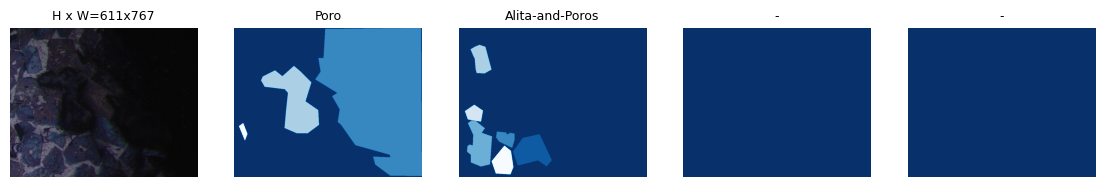

uint8 (766, 682, 24) uint8 [1 1 1 1 1 1 2 2 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1] 24


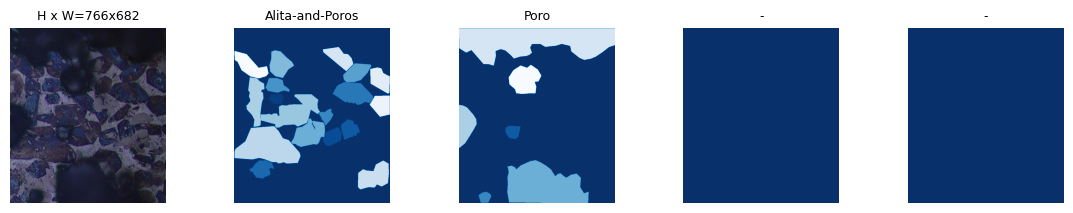

uint8 (766, 682, 39) uint8 [2 2 2 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1] 39


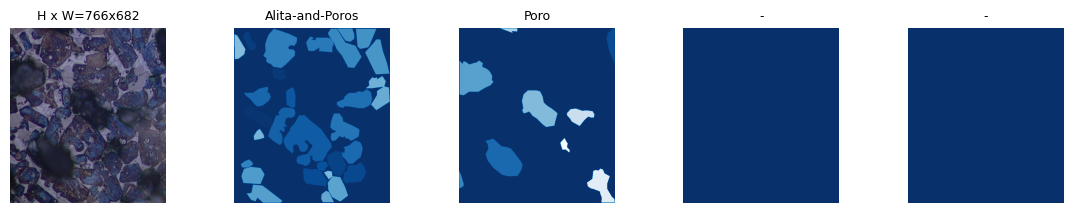

uint8 (766, 682, 39) uint8 [2 2 2 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1] 39


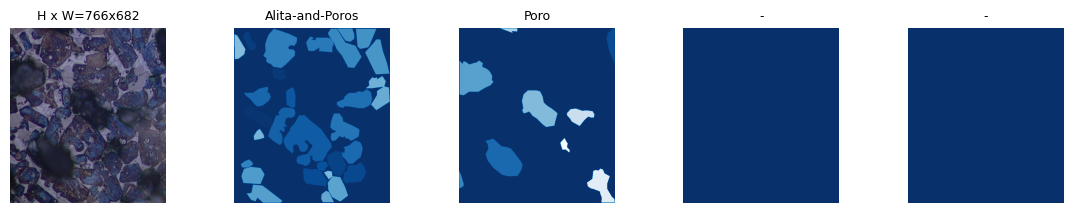

In [4]:
import numpy as np
from mrcnn.Utils import visualize


# Load image samples
def display_image_samples(dataset_train):
    # Load and display random samples
    image_ids = np.random.choice(dataset_train.image_ids, 4)

    for image_id in image_ids:
        image = dataset_train.load_image(image_id)
        mask, class_ids = dataset_train.load_mask(image_id)
        print(image.dtype, mask.shape, mask.dtype, class_ids, len(class_ids))
        visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

display_image_samples(dataset_train)

##**3. Training**

Train Mask RCNN on your custom Dataset.

In [ ]:
from mrcnn.model import MaskRCNN
from mrcnn.Configs import Config


config = Config(name="alita_and_poros", num_classes=2, interpolation_method="bilinear", steps_per_epoch=300, validation_steps=5)
model = MaskRCNN(mode="training", config=config)
# Which weights to start with?
model.load_weights(init_with='coco')

Using downloaded weights at ./logs/mask_rcnn_coco.h5
Using weights ./logs/mask_rcnn_coco.h5


In [ ]:
# Start Training
# This operation might take a long time.
hist_learning = model.train(
    dataset_train, dataset_val,
    learning_rate=config.LEARNING_RATE,
    epochs=3,
    layers='heads'
)


Starting at epoch 0. LR=0.001

Checkpoint Path: ./logs/alita_and_poros20230605T1354/mask_rcnn_alita_and_poros_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_deconv      

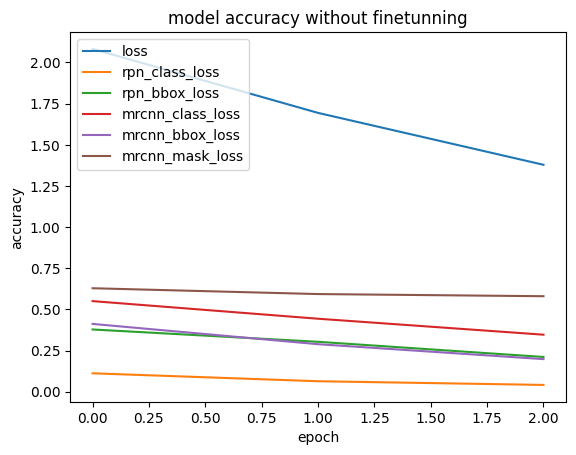

In [ ]:
import matplotlib.pyplot as plt


for key in hist_learning.history.keys():
  if key.startswith('val_'):
    continue
  plt.plot(hist_learning.history[key])

plt.title('model accuracy without finetunning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(hist_learning.history.keys(), loc='upper left')
plt.show()

In [ ]:
# Fine tune all layers
hist_learning = model.train(
    dataset_train, dataset_val,
    learning_rate=config.LEARNING_RATE / 10,
    epochs=2,
    layers='all'
)


Starting at epoch 3. LR=0.0001

Checkpoint Path: ./logs/alita_and_poros20230605T1354/mask_rcnn_alita_and_poros_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch

In [ ]:
for key in hist_learning.history.keys():
  if key.startswith('val_'):
    continue
  plt.plot(hist_learning.history[key])

plt.title('model accuracy with finetunning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(hist_learning.history.keys(), loc='upper left')
plt.show()

## **4. Detection (test your model on a random image)**

In [ ]:
# Load Test Model
# The latest trained model will be loaded
config.IMAGES_PER_GPU = 1
config.INTERPOLATION_METHOD = 'bicubic'
#model = MaskRCNN(mode="inference", config=config)
model.rebuild_as("inference", config)
model.load_weights(init_with='last')

Using weights ./logs/alita_and_poros20230605T1354/mask_rcnn_alita_and_poros_0003.h5
Re-starting from epoch 3


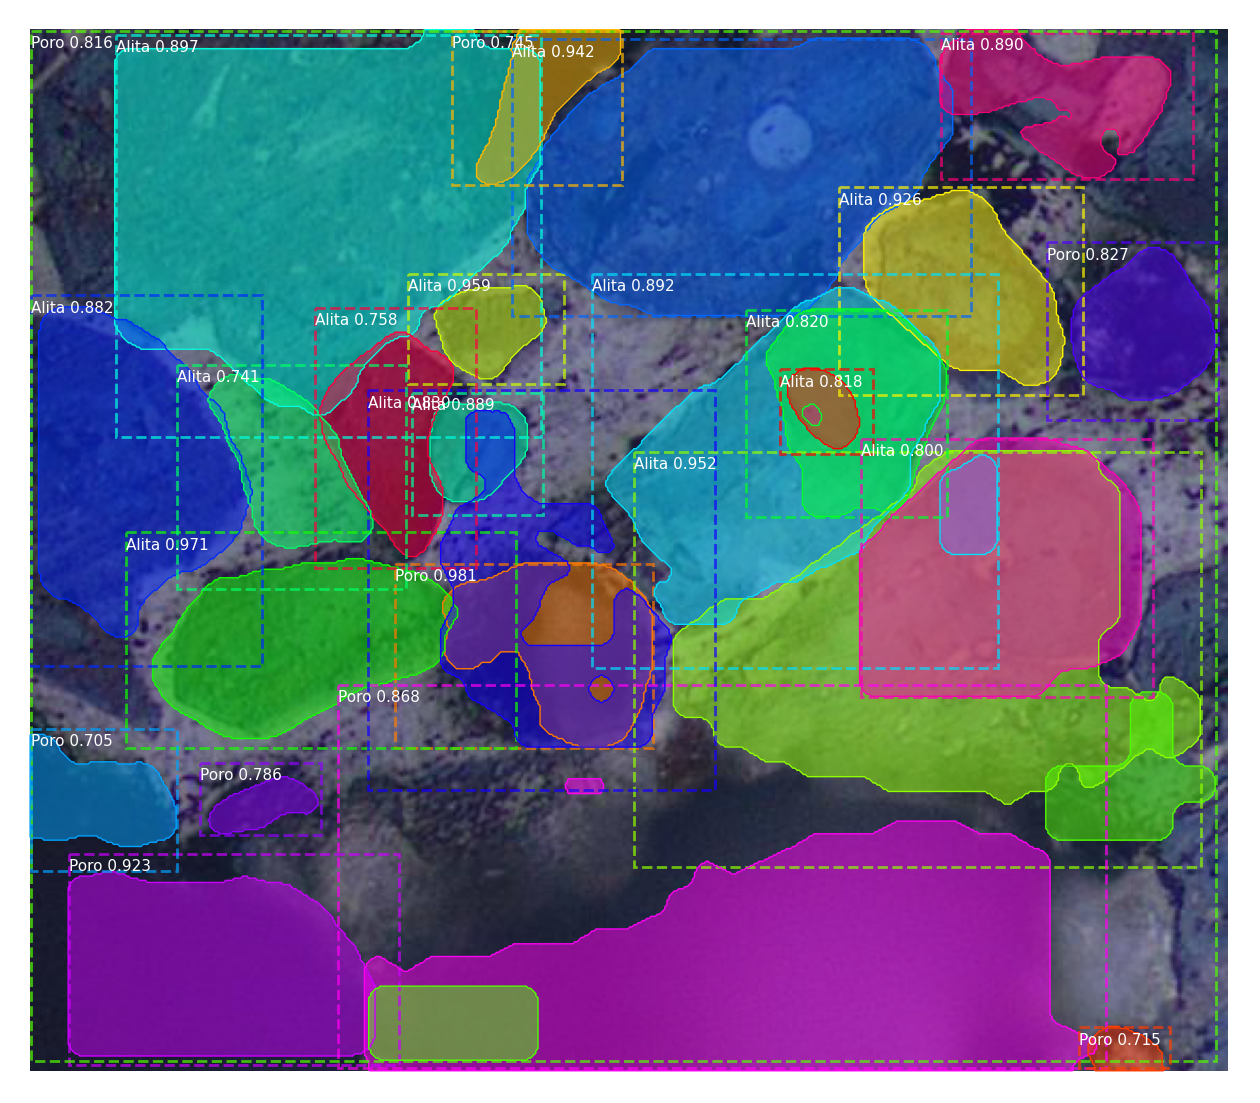

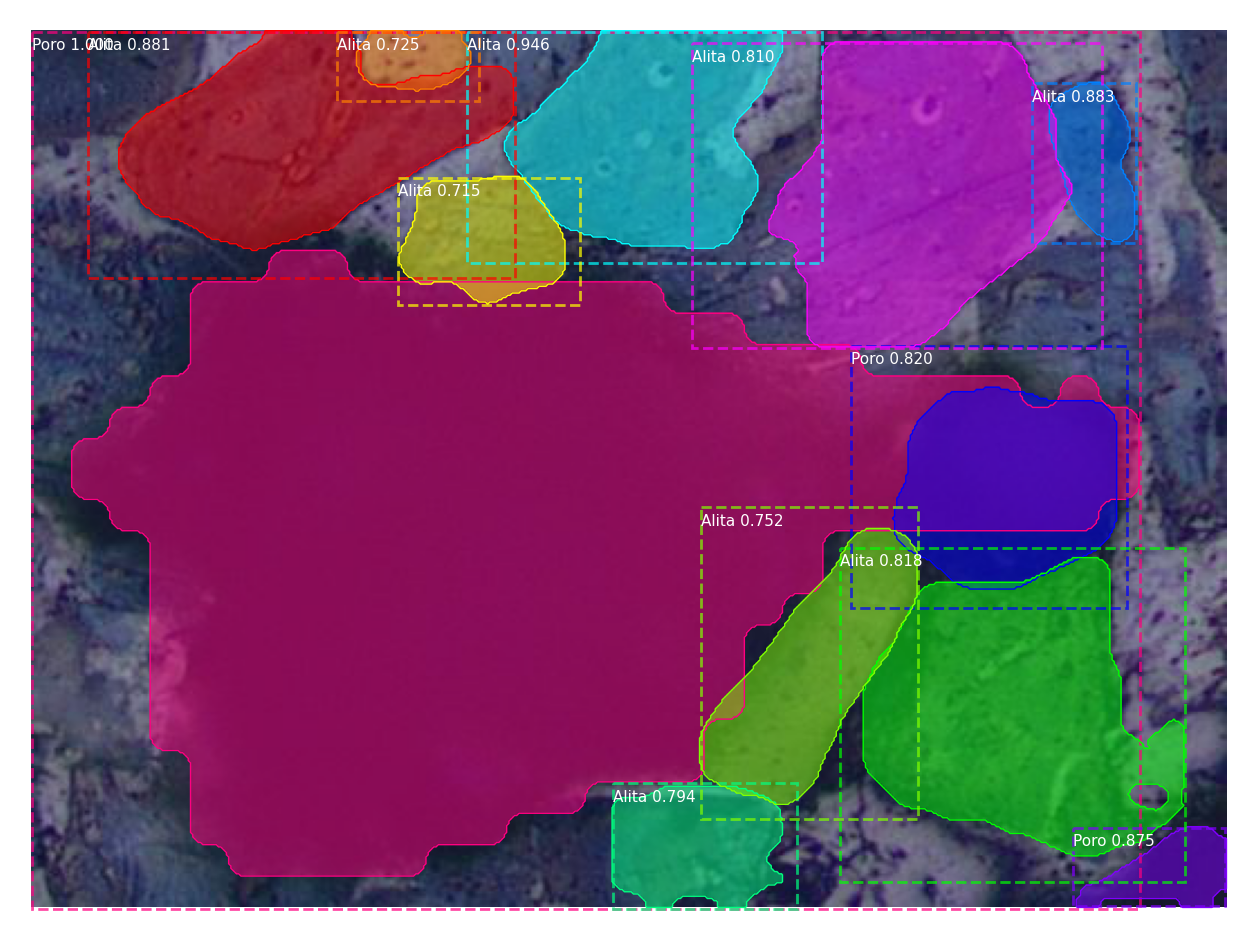

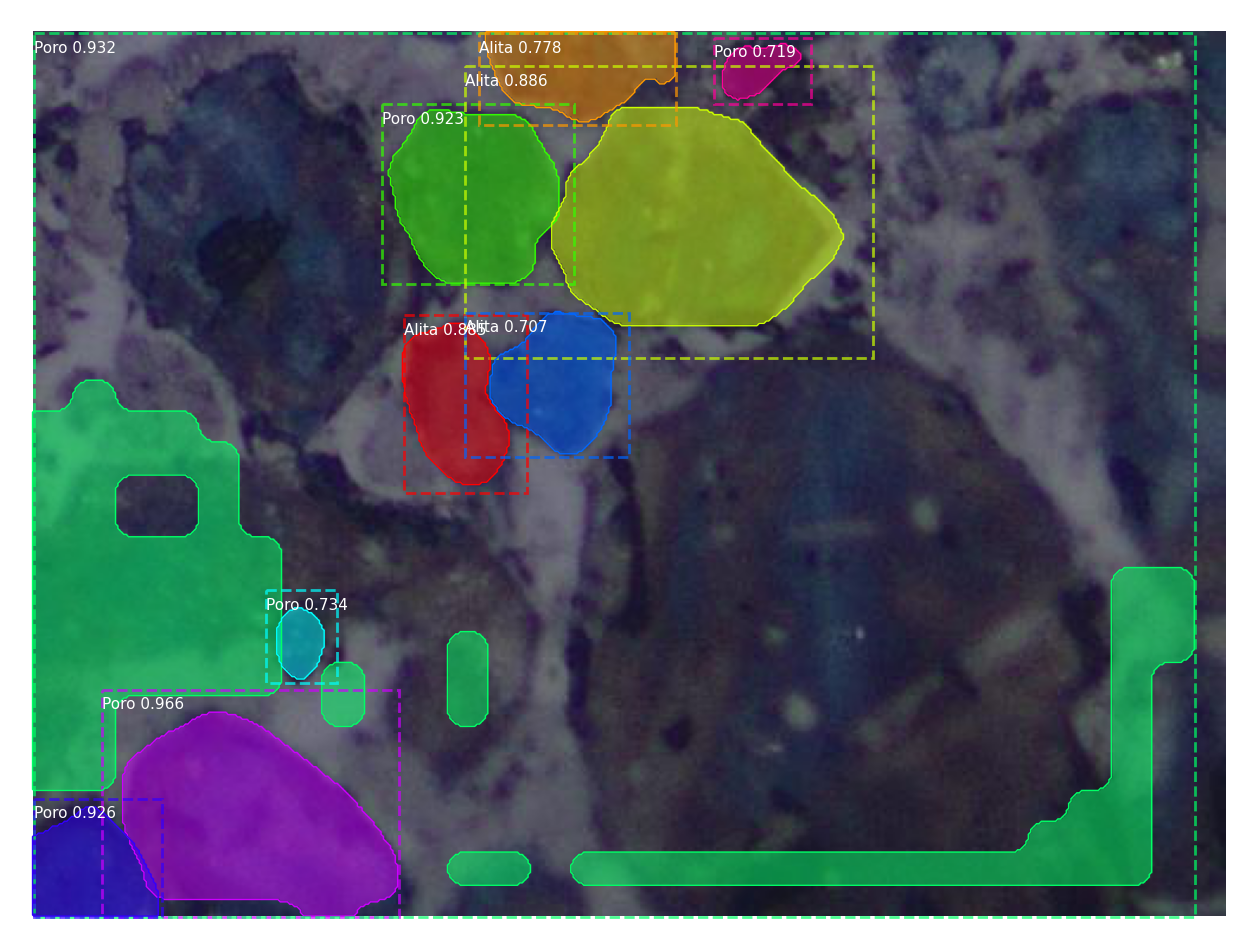

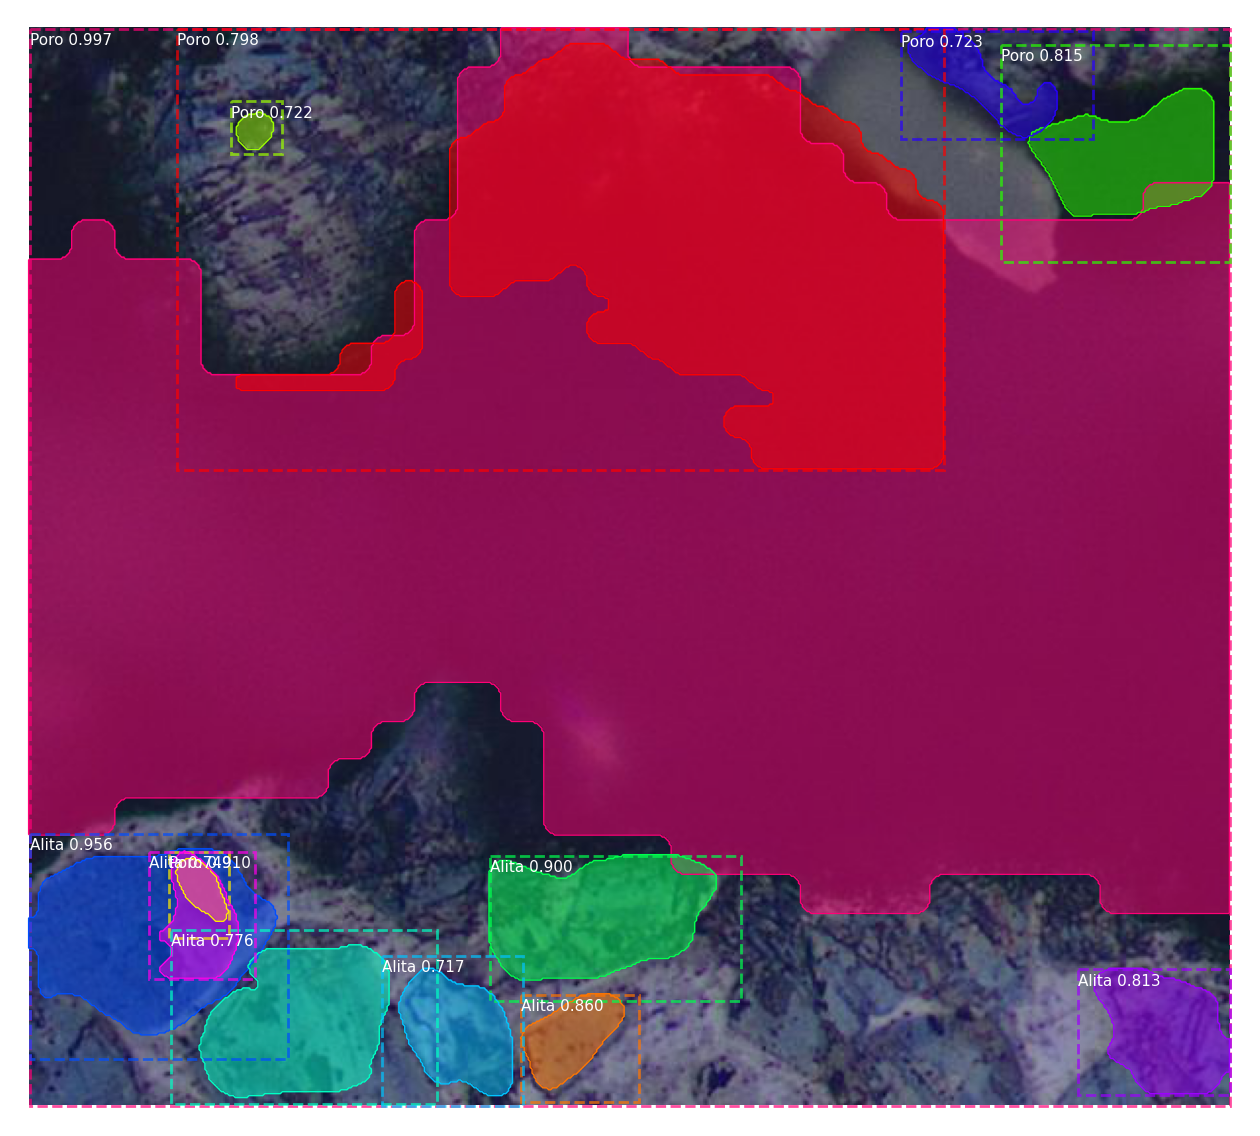

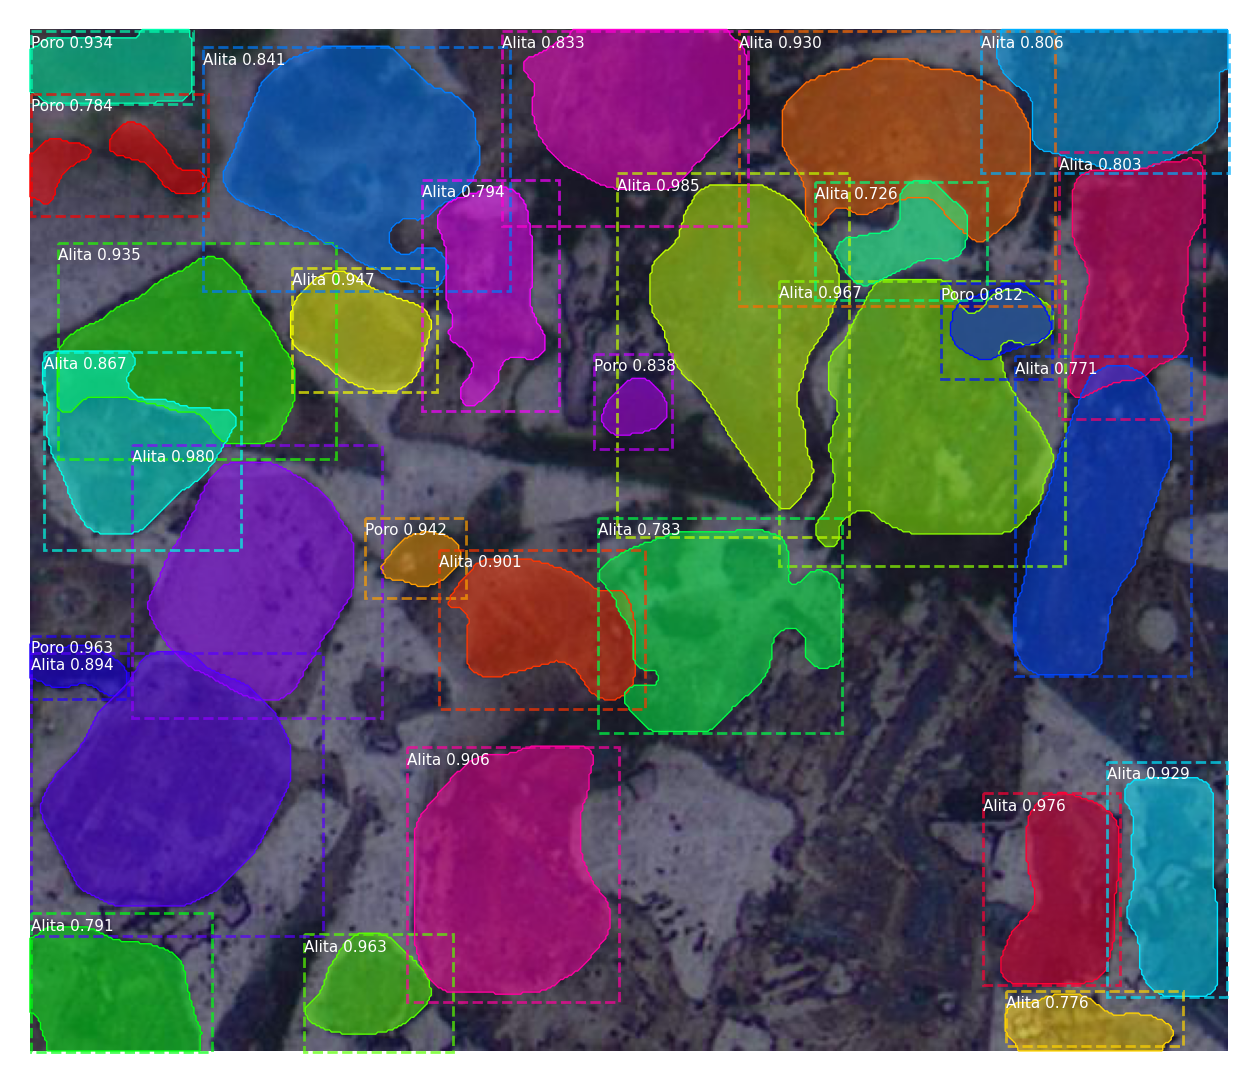

In [ ]:
from mrcnn.Utils import visualize
import skimage


for _ in range(5):
  image_id = np.random.choice(dataset_val.image_ids, 1)[0]
  img = skimage.io.imread(dataset_val.image_info[image_id].get('path'))

  r = model.detect([img], verbose=0)[0]
  visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], ['BG', 'Alita', 'Poro'], r['scores'])